In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/cleaned_players.csv'


In [3]:
df_cleaned = pd.read_csv(url, error_bad_lines = False)


In [4]:
url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/players_raw.csv'
df_raw = pd.read_csv(url, error_bad_lines = False )

In [5]:
df_cleaned ['ability'] = df_cleaned['influence'] + df_cleaned['creativity'] + df_cleaned['threat']

In [6]:
df = pd.concat([df_cleaned, df_raw['points_per_game'],df_raw['web_name'], df_raw['element_type']], axis =1)
df['matches'] = round(df['total_points']/ df['points_per_game'])
df = df[df['element_type'] > 1] 
df = df[df['minutes']> 90*12]
df['normalized_points'] = (df['total_points']/ df['minutes'])*90*38

In [7]:
df_k = df[df['element_type'] > 2] # only mid and attack
df_info = df_k[['web_name', 'matches', 'goals_scored', 'assists', 'normalized_points', 'total_points', 'now_cost']] 

### The overperformers

In [8]:
df_info.sort_values (by = ['normalized_points'], ascending = False).head(10).set_index('web_name')

,matches,goals_scored,assists,normalized_points,total_points,now_cost
web_name,,,,,,
Fernandes,14.0,8,8,337.101938,117,90
Agüero,24.0,16,6,311.552795,132,116
Mahrez,33.0,11,14,309.462254,175,86
De Bruyne,35.0,13,23,307.677419,251,106
Salah,34.0,19,10,276.783605,233,125
Mané,35.0,18,10,275.344262,221,121
Greenwood,31.0,10,1,270.345357,103,48
Sterling,33.0,20,6,263.176160,204,120
David Silva,27.0,6,12,261.054366,139,75


### The good ones 

In [9]:
k = df_info.sort_values (by = ['normalized_points'], ascending = False).set_index('web_name')
k[11:25]

,matches,goals_scored,assists,normalized_points,total_points,now_cost
web_name,,,,,,
Jesus,34.0,14,8,247.433102,146,99
Adams,30.0,4,4,243.616438,78,53
Ings,38.0,22,2,241.842857,198,76
Abraham,34.0,15,6,237.198549,153,73
Vardy,35.0,23,7,236.873351,210,97
Mousset,30.0,6,4,234.897792,84,43
Son,30.0,11,13,233.244552,169,97
Rashford,31.0,17,8,228.862004,177,89
Aubameyang,36.0,22,5,223.565051,205,109


### Fucking Disgrace

In [10]:
df_info.sort_values (by = ['normalized_points'], ascending = False).tail(10).set_index('web_name')

,matches,goals_scored,assists,normalized_points,total_points,now_cost
web_name,,,,,,
André Gomes,19.0,0,1,91.544269,39,52
McLean,37.0,1,1,88.816189,77,48
Stephens,33.0,0,1,85.330693,63,44
Trybull,16.0,0,0,84.893617,28,43
McCarthy,34.0,0,0,84.064748,41,42
Lerma,32.0,1,2,82.272391,65,48
Nakamba,29.0,0,0,80.536692,43,44
Winks,31.0,0,0,80.000000,52,52
Fred,29.0,0,0,79.276773,50,51


In [11]:
df_d = df[df['element_type'] == 2] # only defence
df_info = df_d[['web_name', 'matches', 'goals_scored', 'assists', 'normalized_points', 'total_points', 'now_cost']]
df_info.sort_values (by = ['normalized_points'], ascending = False).tail(10).set_index('web_name')

,matches,goals_scored,assists,normalized_points,total_points,now_cost
web_name,,,,,,
Hause,18.0,1,0,75.310881,34,44
Steve Cook,29.0,1,0,73.275649,52,50
Lewis,28.0,1,0,71.342894,48,44
Aarons,37.0,0,2,69.666667,66,42
Taylor,14.0,0,0,69.154412,22,42
Delph,16.0,0,0,69.149115,24,53
Christensen,21.0,0,0,66.407767,34,48
Hanley,15.0,0,0,62.379064,23,40
Mariappa,20.0,0,0,58.926441,26,41


In [12]:
df['element_type'].replace({ 2:'Defender', 3:'Midfielder', 4:'Forward'},inplace = True)

# Plots 

## All in one

In [13]:
sns.set(font_scale = 1.15, color_codes=True)
plt.gcf().set_size_inches(15, 8.27)

<Figure size 1080x595.44 with 0 Axes>

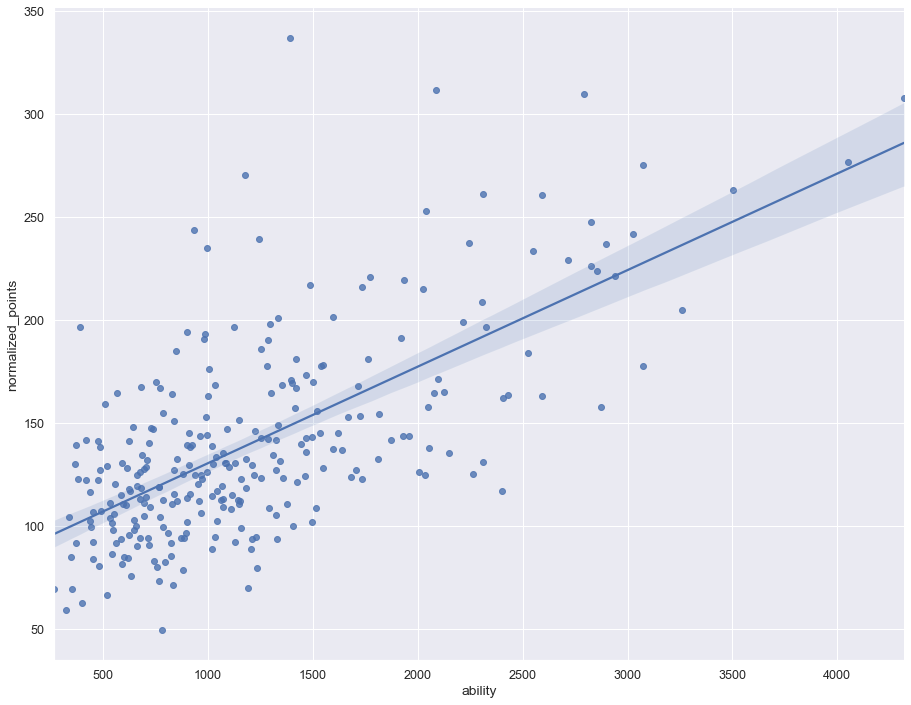

In [14]:

sns.lmplot('ability','normalized_points', df)
plt.gcf().set_size_inches(15, 11.27)


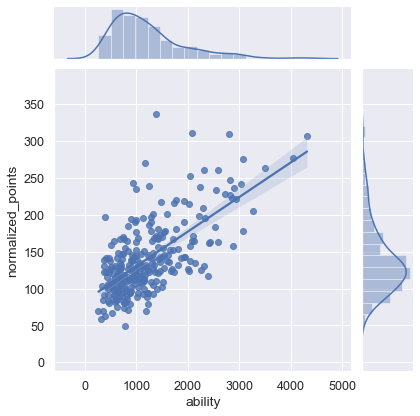

In [15]:
sns.jointplot('ability','normalized_points', df, kind = 'reg')

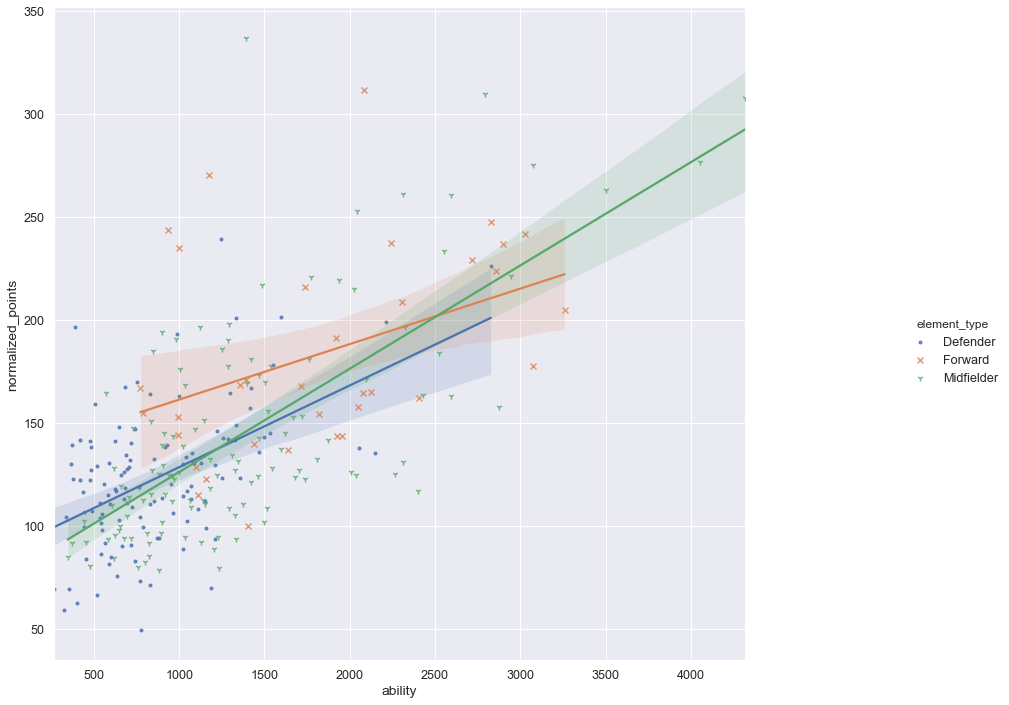

In [16]:
#sns.load_dataset('data')
sns.lmplot('ability','normalized_points', df, hue = 'element_type', markers = ['.', 'x', '1'])
plt.gcf().set_size_inches(16, 11.27)


## Either good or bad - No escape

C:\Users\swapn\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\swapn\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\swapn\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\swapn\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


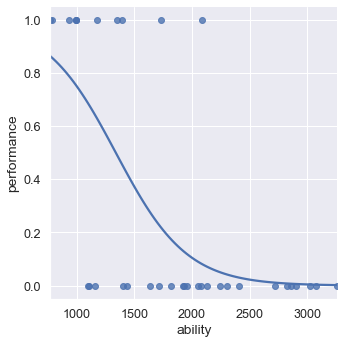

In [25]:
df_f = df[ df['element_type'] == 'Forward']

df_f['performance'] = (df_f.normalized_points / df_f.ability) >.12
sns.lmplot('ability','performance', df_f, logistic = True)


## Watch out

### Forwards

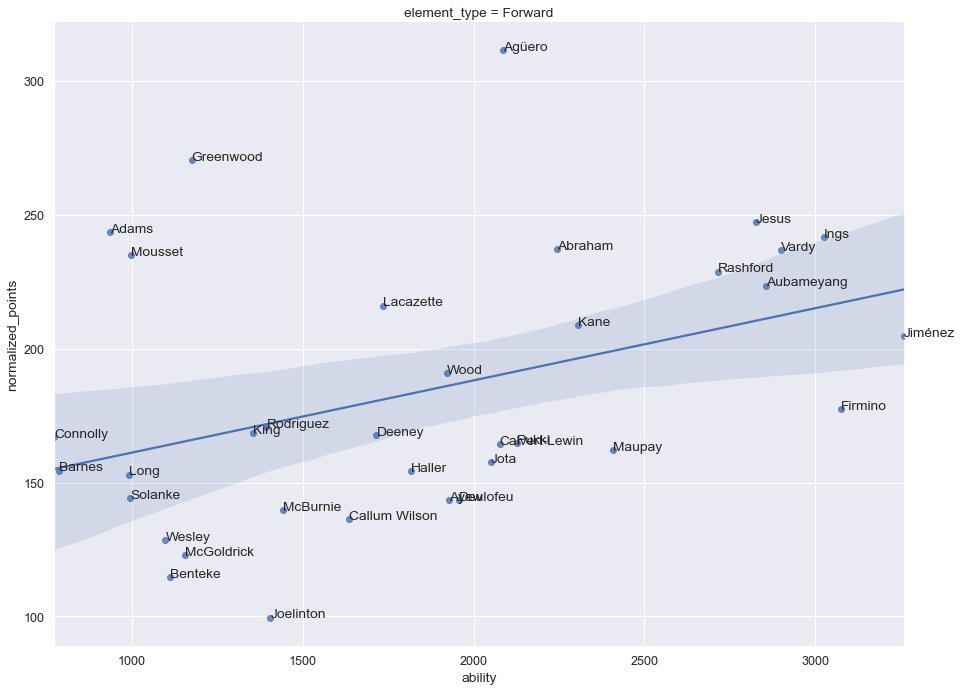

In [18]:
df_f = df[ df['element_type'] == 'Forward']

sns.lmplot('ability','normalized_points', df_f, col = 'element_type')
plt.gcf().set_size_inches(15, 11.27)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y']+.02, str(point['val']))

label_point(df_f.ability, df_f.normalized_points, df_f.web_name, plt.gca())  

## Midfielders

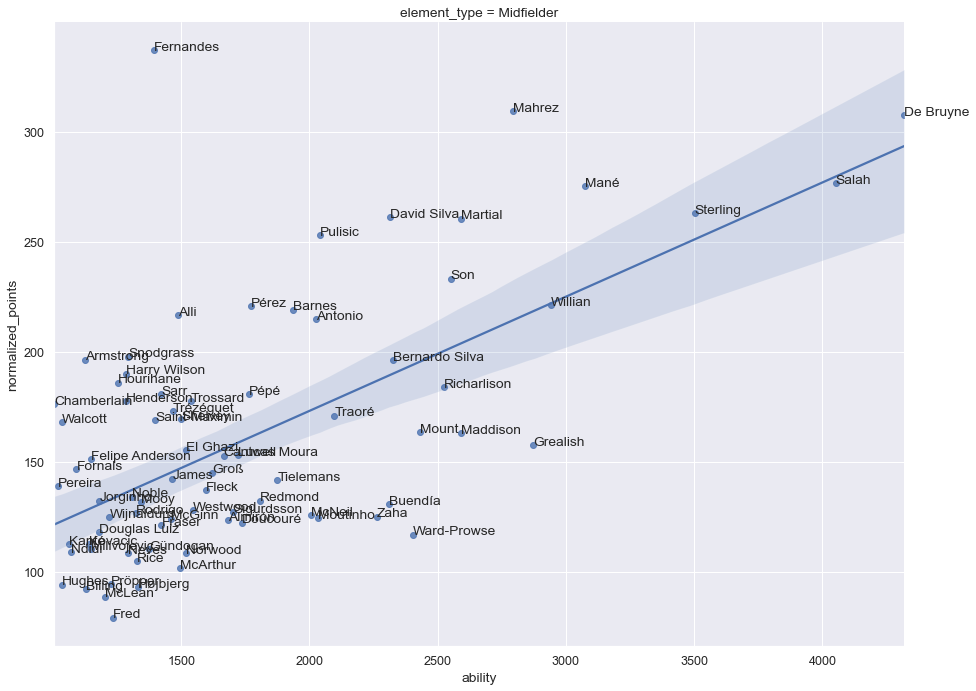

In [19]:
df_m = df[ (df['element_type'] == 'Midfielder') & (df['ability'] > 1000)]

sns.lmplot('ability','normalized_points', df_m, col = 'element_type', robust = True)
plt.gcf().set_size_inches(15, 11.27)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y']+.02, str(point['val']))

label_point(df_m.ability, df_m.normalized_points, df_m.web_name, plt.gca())  


## Defence 

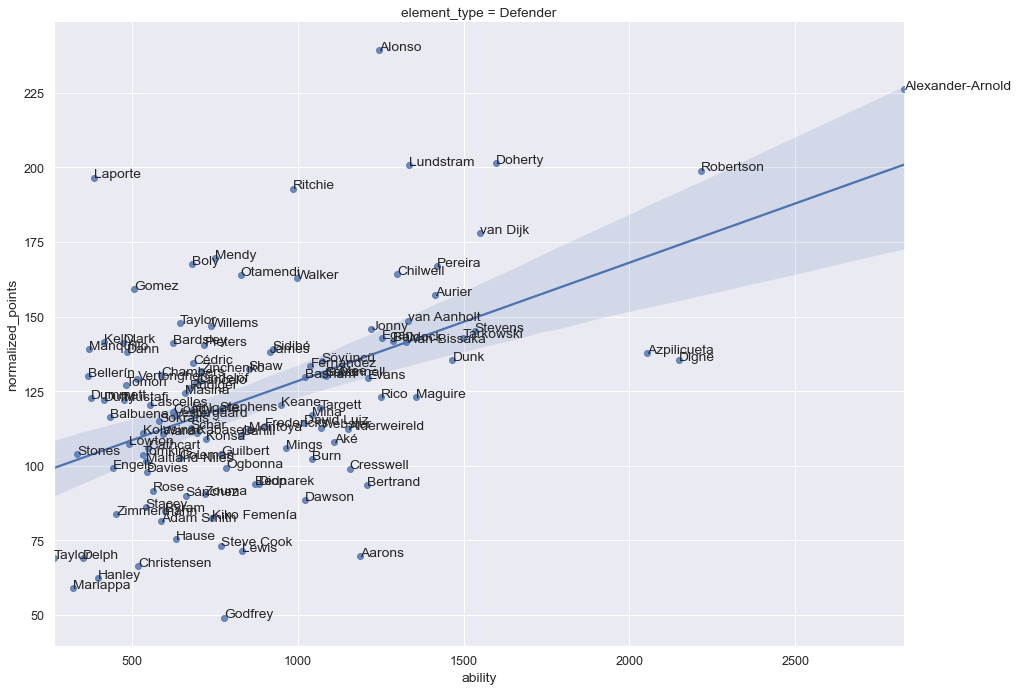

In [20]:
df_d = df[ df['element_type'] == 'Defender']

sns.lmplot('ability','normalized_points', df_d, col = 'element_type')
plt.gcf().set_size_inches(15, 11.27)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(df_d.ability, df_d.normalized_points, df_d.web_name, plt.gca())  
